# Initialization

In [41]:
import pandas as pd
import numpy as np
import zipcodes
from census import Census
from us import states


# Get state FIPS
state_fips = states.TX.fips

# Create census object
c = Census("c233266138b0f02f6217194066f858414e128d04") 

# Get population data for all zip code tabulation areas (ZCTAs) in state
pop = c.acs5.state_zipcode(('B01003_001E'), state_fips, '*')

AttributeError: type object 'Census' has no attribute 'all'

# Populate Dataframe

In [42]:
# Initialize dataframe
pop_df = pd.DataFrame(columns=['Latitude (deg)','Longitude (deg)','Population Estimate'],data=np.zeros((len(pop),3),dtype=np.float32))

# Loop through each zip code
for ii in range(len(pop)):
    
    # Index = zip code
    zip_ii = pop[ii]['zip code tabulation area']
    #print(zip_ii)
    
    # Get latitude & Longitude and assign
    zip_loc = zipcodes.matching(zip_ii)
    #print(zip_loc)
    lat_ii = zip_loc[0]['lat']
    long_ii = zip_loc[0]['long']
    #print(lat_ii)
    #print(long_ii)
    
    # Get population
    pop_ii = pop[ii]['B01003_001E']
    #print(pop_ii)
    
    # Re-index and populate dataframe
    pop_df.rename(index={ii:zip_ii}, inplace=True)
    pop_df.iloc[ii,0] = lat_ii
    pop_df.iloc[ii,1] = long_ii
    pop_df.iloc[ii,2] = pop_ii


1935


# Save to csv

In [43]:
pop_df.to_csv('tx.csv',index=True)

# State Population Sanity Check

In [44]:
c.acs5.get(('B01003_001E'),{'for': 'state:{}'.format(states.TX.fips)})

[{'B01003_001E': 28260856.0, 'state': '48'}]

# Get the data and graph that shit

1935


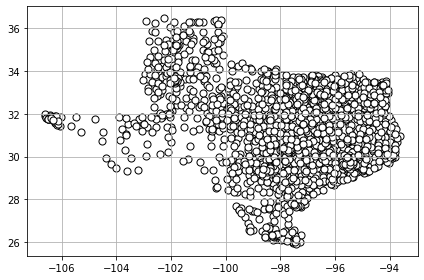

In [62]:
import matplotlib.pyplot as plt

# Get latitude and longitude data of each ZCTA
X = pop_df.iloc[:,0:2].to_numpy(dtype=float)

# Plot scatter data
plt.scatter(X[:,1],X[:,0],c='white',marker='o',edgecolor='black',s=50)
plt.grid()
plt.tight_layout()
plt.show()

# Group points and draw boundaries

In [1]:
from sklearn.cluster import KMeans

sample_weights = pop_df.iloc[:,2].to_numpy(dtype=np.uint32)
n_districts = 36 # Actual number of districts = 36


# Create KMeans object
km = KMeans(n_clusters=n_districts, init='random', n_init=100, max_iter=1000, tol=1e-05, random_state=0)

# Fit clusters
y_km = km.fit_predict(X,sample_weight=sample_weights)

# Colors
district_colors = ['lightgreen','darkgreen','orange','lightblue','darkblue','yellow','red','purple','magenta','olive','white','darkgrey','black']

# plot each group
for ii in range(n_districts):
    # Pick color for group
    color = district_colors[ii%(len(district_colors))]
    
    # Add cluster to plot
    plt.scatter(X[y_km == ii,1], X[y_km == ii,0], s=20, c=color, marker='o',edgecolor='black',label='Cluster {}'.format(ii))
    
#plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'pop_df' is not defined

# Toy problem / tester

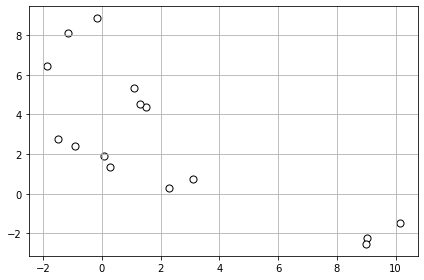

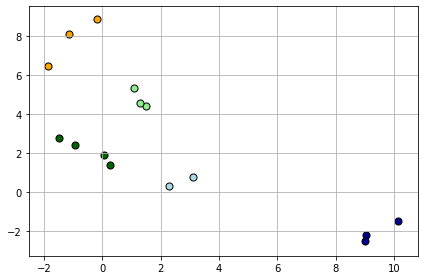

In [6]:
# Create groups to play around with
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Define number of centers
n_districts = 36 # Actual number of districts
n_districts = 5

# Create scatter data
X,y = make_blobs(n_samples=15, n_features=2, centers=n_districts, cluster_std=0.7, shuffle=True, random_state=0)

# Plot scatter data
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolor='black',s=50)
plt.grid()
plt.tight_layout()
plt.show()

# Cluster them
from sklearn.cluster import KMeans

# Create KMeans object
km = KMeans(n_clusters=n_districts, init='random', n_init=100, max_iter=1000, tol=1e-05, random_state=0)

# Fit clusters
y_km = km.fit_predict(X)

# Colors
district_colors = ['lightgreen','darkgreen','orange','lightblue','darkblue','yellow','red','purple','magenta','olive','white','darkgrey','black']

# plot each group
for ii in range(n_districts):
    # Pick color for group
    color = district_colors[ii%(len(district_colors))]
    
    # Add cluster to plot
    plt.scatter(X[y_km == ii,0], X[y_km == ii,1], s=50, c=color, marker='o',edgecolor='black',label='Cluster {}'.format(ii))
    
#plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


# TO DO

In [ ]:
# PACKAGE requirements and installation
# README

# OVERALL OPERATION
# inputs(state ID)
# read in key from file
# check if state data available (data/TX.csv). if not available, generate it by running the algorithm
#
# if running as __main__:
# accept state
# if no data file for state, go and get it
# 
# else if data exists
# generate cluster
# 

# DATA OUTPUT
# Save plots
# save district labels to file

# MAKE PLOTS PRETTIER
# - add state boundaries
# - voronoi diagram/tesselation - add state boundaries as well as tess vertices
